In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/sreen/Desktop/OSU Course/Data Mining/python/project/Stores - Stores.csv')
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [2]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [8]:
df['Store ID'].duplicated().sum()

0

In [2]:
#For PCA we dont want to consider sales column 
X = df.drop(columns = ['Store_Sales'])
X.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,1,1659,1961,530
1,2,1461,1752,210
2,3,1340,1609,720
3,4,1451,1748,620
4,5,1770,2111,450
5,6,1442,1733,760
6,7,1542,1858,1030
7,8,1261,1507,1020
8,9,1090,1321,680
9,10,1030,1235,1130


<AxesSubplot:>

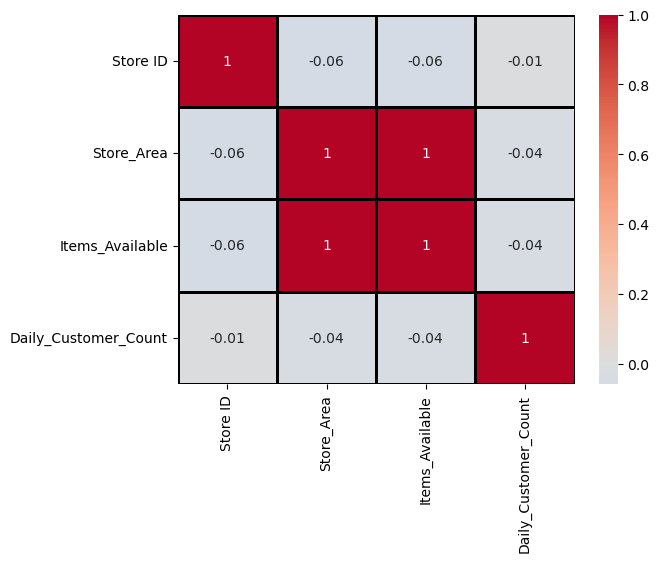

In [11]:
#Correlation Matrix
import seaborn as sns
sns.heatmap(X.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')


In [3]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,0.000000,0.607978,0.593084,0.335484
1,0.001117,0.471802,0.472622,0.129032
2,0.002235,0.388583,0.390202,0.458065
3,0.003352,0.464924,0.470317,0.393548
4,0.004469,0.684319,0.679539,0.283871


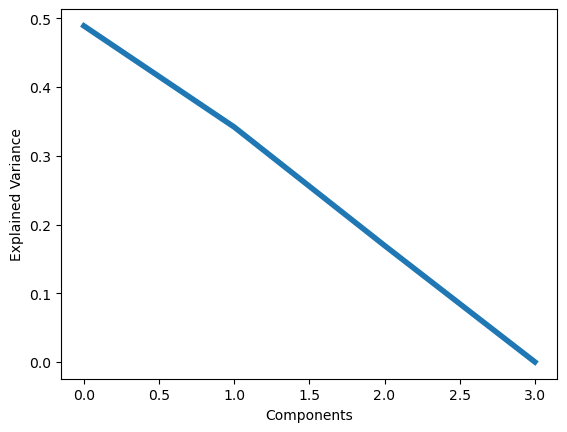

In [19]:
"""# Principal Component Analysis"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#Optimal number of components
model = PCA(random_state=0).fit(X_scaled)
plt.plot(model.explained_variance_ratio_,
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

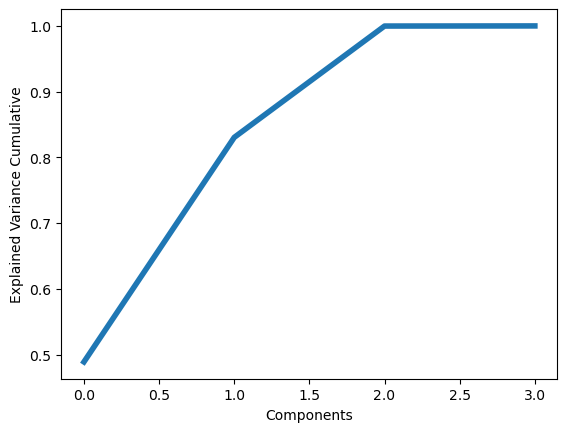

In [17]:
#cumulative
plt.plot(np.cumsum(model.explained_variance_ratio_),
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance Cumulative')
plt.show()

In [4]:
#PCA
model = PCA(n_components=2,
            random_state = 0).fit(X_scaled)

#Interpretation 
model_interpretation = pd.DataFrame(model.components_,
                                    columns = X.columns)
model_interpretation

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,0.987072,-0.113932,-0.112664,-0.003902
1,-0.159707,-0.695058,-0.698421,0.059967


In [5]:
#components
components = model.transform(X_scaled)
components = pd.DataFrame(components,
                          columns = ['pc1',
                                     'pc2'])
components.head()

#merge the dataset
final_dataset = pd.concat([components,df], axis = 1)
final_dataset.head()

,pc1,pc2,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,-0.518114,-0.085088,1,1659,1961,530,66490
1,-0.487119,0.081136,2,1461,1752,210,39820
2,-0.468533,0.216095,3,1340,1609,720,54010
3,-0.484902,0.103032,4,1451,1748,620,53730
4,-0.531939,-0.202341,5,1770,2111,450,46620


In [6]:
"""# Data Prep"""

#tranform categorical variables into dummy variables
dataset = pd.get_dummies(data = final_dataset,
                         drop_first = True)
#dataset.head()

In [11]:
#isolate the x and y variables part 2
y = dataset.iloc[:, -1] #data set with only the labels - source of truth
#X = dataset.iloc[:, :(2,-1)] #data set with everything else but the label
X = dataset.iloc[:, [0,1,3,4,5]]#data set with everything else but the label and store id

In [12]:
X.head(10)
#y.head(10)

,pc1,pc2,Store_Area,Items_Available,Daily_Customer_Count
0,-0.518114,-0.085088,1659,1961,530
1,-0.487119,0.081136,1461,1752,210
2,-0.468533,0.216095,1340,1609,720
3,-0.484902,0.103032,1451,1748,620
4,-0.531939,-0.202341,1770,2111,450
5,-0.481370,0.118432,1442,1733,760
6,-0.496899,0.030578,1542,1858,1030
7,-0.450960,0.305634,1261,1507,1020
8,-0.423524,0.448919,1090,1321,680
9,-0.413268,0.529451,1030,1235,1130


In [13]:
#split dataset into training and test set , 20% for testing and 80% for training - Labels and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state=100)

In [14]:
#X_train.describe()
#X_test.describe()
y_test.describe()

count       180.000000
mean      59268.444444
std       16622.354297
min       21650.000000
25%       46665.000000
50%       59680.000000
75%       72440.000000
max      102310.000000
Name: Store_Sales, dtype: float64

In [15]:
"""# Random Forest"""

#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300,
                               criterion="entropy",
                               random_state = 1502)
model.fit(X_train, y_train)

#PRedictions
predictions = model.predict(X_test)
predictions[:20]


array([92240, 47460, 52160, 39200, 62420, 81820, 50940, 47350, 70610,
       52780, 48610, 35600, 47310, 63540, 49270, 65890, 80410, 36560,
       51320, 21300], dtype=int64)

<AxesSubplot:>

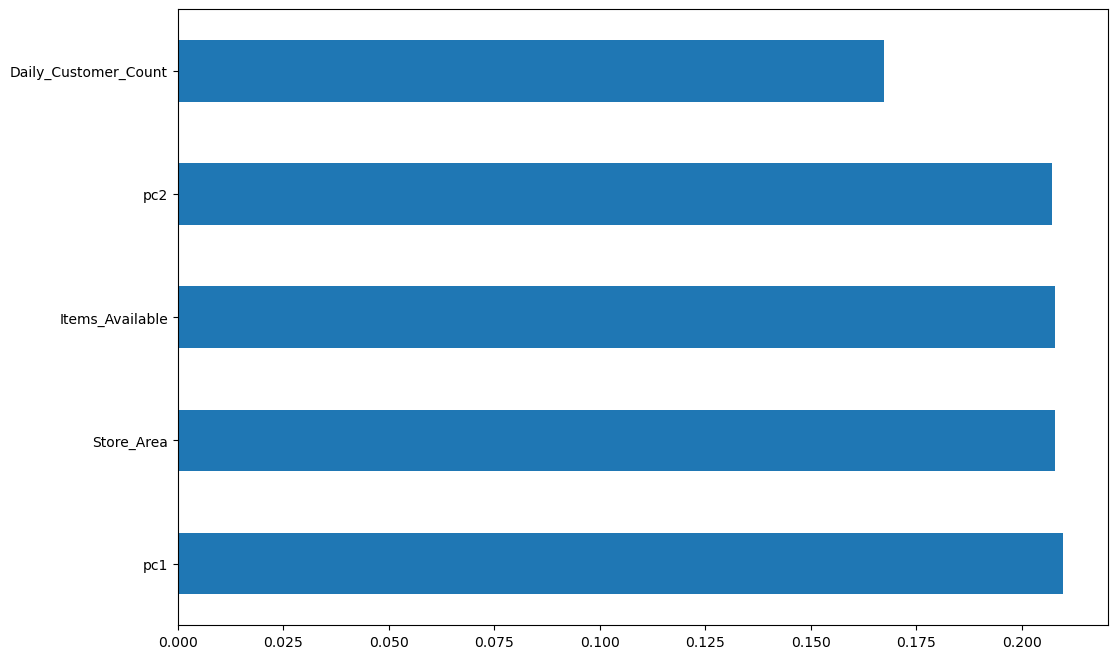

In [16]:
"""# Feature Importance"""

#feature importance
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind='barh',
                             figsize = (12,8))